# HACKATHON TASK

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv("data.csv")
#to know the shape
df.shape

(2227, 3)

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [6]:
#to check the null values in the data set
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
df['x2'].mode()

0   -113.0
1    -55.0
dtype: float64

In [8]:
df['x1'].mode()

0   -118.366669
dtype: float64

In [9]:
df['x1'] = df['x1'].fillna(df['x1'].mode()[0])
df['x2'] = df['x2'].fillna(df['x2'].mode()[0])

In [10]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

## Data visualization

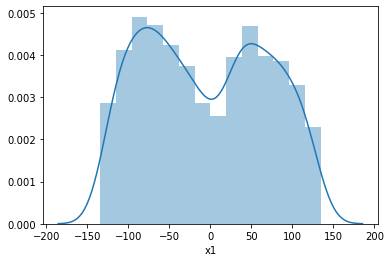

In [11]:
import seaborn as sns
sns.distplot(df['x1'])

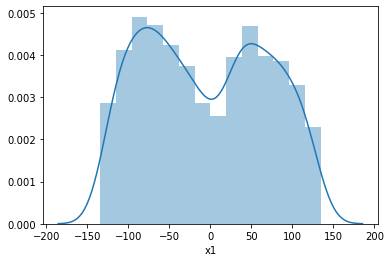

In [12]:
import seaborn as sns
sns.distplot(df['x1'])

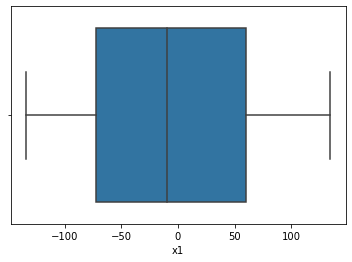

In [13]:
import seaborn as sns
sns.boxplot(x=df['x1'])

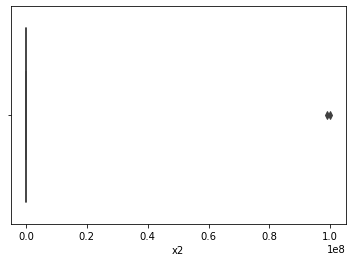

In [14]:
import seaborn as sns
sns.boxplot(x=df['x2'])

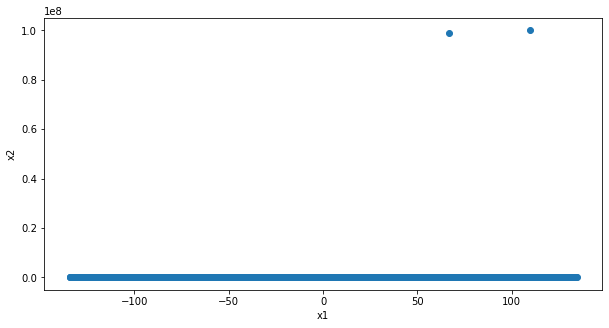

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['x1'], df['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [16]:
#Inter quartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

x1    131.803998
x2    144.333978
y       1.000000
dtype: float64


# Feature Scaling

In [17]:
df_scaled = df.copy()
col_names = ['x1', 'x2']
features = df_scaled[col_names]
features.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,x1,x2,y
0,-0.828630,0.807614,1
1,-0.690102,0.688287,1
2,-0.911420,0.750577,1
3,-0.793250,0.711971,1
4,-0.828630,0.807614,1
...,...,...,...
2222,0.825954,0.631932,0
2223,0.810167,0.641333,0
2224,0.727018,0.730288,0
2225,0.676070,0.555458,0


In [19]:
df_scaled.head()

,x1,x2,y
0,-0.828630,0.807614,1
1,-0.690102,0.688287,1
2,-0.911420,0.750577,1
3,-0.793250,0.711971,1
4,-0.828630,0.807614,1


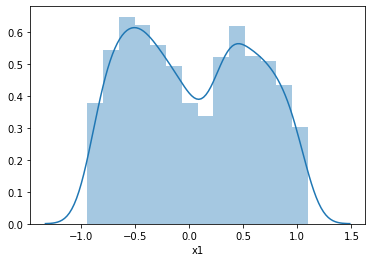

In [20]:
import seaborn as sns
sns.distplot(df_scaled['x1'])

# Modeling

In [21]:
#
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
#splitting X and y into training and testing sets
import sklearn 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Logistic Regression

In [23]:
#importing  the class
from sklearn.linear_model import LogisticRegression

#instantiate the model(using the default parameters)
logreg = LogisticRegression()

#fitting the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [24]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[226,  76],
       [162,  93]], dtype=int64)

In [25]:
#score
(226+93)/(226+93+76+162)

0.5727109515260324

In [26]:
# getting the accuracy[(tp+tn)/total]
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.5727109515260324


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5727109515260324
Precision: 0.5502958579881657
Recall: 0.36470588235294116


# SVM Linear (kernal)

In [1]:
#use SVC(linear kernal)
from sklearn.svm import SVC
svc_lin = SVC(kernel ='linear',random_state=0)
svc_lin.fit(X_train,y_train)
y_pred=svc_lin.predict(X_test )

NameError: name 'X_train' is not defined

In [ ]:
# getting the accuracy[(tp+tn)/total]
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# SVM rbf

In [27]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svc_rbf = svm.SVC(kernel='rbf') # rbf Kernel

#Train the model using the training sets
svc_rbf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svc_rbf.predict(X_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5421903052064632


In [29]:
# getting the accuracy[(tp+tn)/total]
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.5421903052064632


In [30]:
#Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
#Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5421903052064632
Precision: 0.0
Recall: 0.0


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [31]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

In [32]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[283,  19],
       [ 22, 233]], dtype=int64)

In [33]:
# getting the accuracy[(tp+tn)/total]
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.926391382405745


In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
#Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.926391382405745
Precision: 0.9246031746031746
Recall: 0.9137254901960784


# KNN

In [35]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test , y_pred)

array([[291,  11],
       [ 15, 240]], dtype=int64)

In [37]:
# getting the accuracy[(tp+tn)/total]
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9533213644524237


In [38]:
#recall score [tp / (tp + fn)]
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9411764705882353

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533213644524237


In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9533213644524237
Precision: 0.9561752988047809
Recall: 0.9411764705882353


# Hyperparameter Tuning

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
#GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_neighbors': 5, 'p': 2}
KNeighborsClassifier()

0.9533213644524237


In [48]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [49]:
print(clf.cv_results_['split0_test_score'])

[0.95209581 0.95209581 0.95209581 0.95209581 0.95209581 0.95209581
 0.95808383 0.95808383 0.96107784 0.96407186 0.96407186 0.95808383
 0.95508982 0.96107784 0.95808383]


In [50]:
#RandomizedSearchCV

In [51]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf = RandomizedSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()

0.9533213644524237


## Support Vector Machines

In [52]:
from sklearn.svm import SVC

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))


# Conclusion

In this task, data was loaded, and features were preprocessed to extract valuable characteristics. Four types of algorithms were analyzed under multiple evaluation metrics , Decision tree and knearest neighbor presented the best results with more than 90% accuracy.. So finlly we can use any one from the above models